# **Class 2: Python OOP Advanced**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
project_path = '/Users/tmsantos/Documents/CapstoneProject/CapstoneProject/'

In [3]:
from IPython.display import Image, display

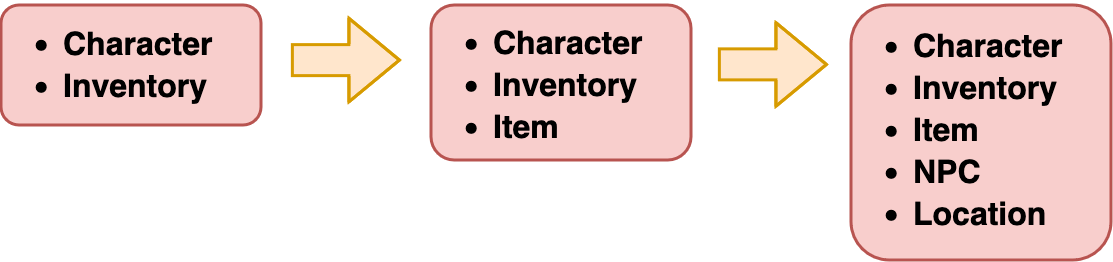

In [13]:
display(Image(filename=project_path+'images/class2/first_part.png', width=800, height=400))

## From the previous class:
 ### - `Character`
 ### - `Item`

In [14]:
class Inventory:
    def __init__(self, capacity=10):
        self.items = []
        self.capacity = capacity

    def add_item(self, item):
        if len(self.items) < self.capacity:
            self.items.append(item)
            return True
        return False

    def remove_item(self, item):
        if item in self.items:
            self.items.remove(item)
            return True
        return False

In [15]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = strength
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = defense
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x-1, y)
        elif direction == 'south':
            self.position = (x+1, y)
        elif direction == 'east':
            self.position = (x, y+1)
        elif direction == 'west':
            self.position = (x, y-1)

    @property
    def total_stats(self):
        return self.strength + self.intelligence + self.charisma + self.defense

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

We will start class 2 by implementing an `Item` class, an item should have a value (trading system of the game) and an effect on our character. We also need to be able to use that item.

In [ ]:
class Item:
    def __init__(self, name, value, effect, description):
        self.name = name
        self.value = value
        self.effect = effect
        self.description = description

    def use(self, player):
        print(f"{player.name} uses {self.name}")
        self.effect(player)

After creating our `Item` we need to update our `Inventory` class.

In [1]:
class Inventory:
    def __init__(self, capacity=10):
        self.items = []
        self.capacity = capacity

    def add_item(self, item):
        if len(self.items) < self.capacity:
            self.items.append(item)
            return True
        return False

    def remove_item(self, item):
        if item in self.items:
            self.items.remove(item)
            return True
        return False

    def get_total_value(self):
        return sum(item.value for item in self.items)

- We also need to add on our character the hability to use an item that is on his inventory and to check his inventory value.

    - use_item method

    - inventory_value method

- In order to build a simple economic system in our game we need to add an attribute to our character that keeps track of his purchasing power.
    
    - gold attribute

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = strength
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = defense
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x-1, y)
        elif direction == 'south':
            self.position = (x+1, y)
        elif direction == 'east':
            self.position = (x, y+1)
        elif direction == 'west':
            self.position = (x, y-1)

    @property
    def total_stats(self):
        return self.strength + self.intelligence + self.charisma + self.defense

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    def use_item(self, item_name):
        for item in self.inventory.items:
            if item.name == item_name:
                item.use(self)
                self.inventory.remove_item(item)
                return True
        print(f"{self.name} does not have {item_name}")
        return False

    @property
    def inventory_value(self):
        return self.inventory.get_total_value()

**Exercise 1:**

  1. **Implement the `take_damage(self, amount)` method**:
    - Updates the character health, considering the amount of damage. It should not be less than 0.

  2. **Implement the `is_alive(self, amount)` method:**
    - Check if the character is alive (health > 0)

  3. **Implement an attribute `defending`that is a boolean:**
    - In combat dynamics with turns is necessary to check if is the character turn to attack or defend.
    - Default value is attacking.

  4. **Update the attributes `strength` and `denfese`:**
    - Ensure `strength` is at least 1
    - Ensure `denfese` is positive

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = max(1, strength)  # Ensure strength is at least 1
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = max(0, defense)  # Ensure defense is non-negative
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)
        self.defending = False

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x-1, y)
        elif direction == 'south':
            self.position = (x+1, y)
        elif direction == 'east':
            self.position = (x, y+1)
        elif direction == 'west':
            self.position = (x, y-1)

    @property
    def total_stats(self):
        return self.strength + self.intelligence + self.charisma + self.defense

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    @property
    def inventory_value(self):
        return self.inventory.get_total_value()

    def use_item(self, item_name):
        for item in self.inventory.items:
            if item.name == item_name:
                item.use(self)
                self.inventory.remove_item(item)
                return True
        print(f"{self.name} does not have {item_name}")
        return False


    def take_damage(self, amount):
        self.health = max(0, self.health - amount)


    def is_alive(self):
        return self.health > 0

## OOP provides several advantages:


*    **Modularity**: Code is organized into reusable objects, making it easier to manage and maintain.
*   **Encapsulation**: Data is bundled with the methods that operate on it, promoting data integrity.
*   **Inheritance**: Classes can inherit properties and behaviors from parent classes, reducing code duplication and enabling hierarchical relationships.
*   **Polymorphism**: Objects of different classes can be used interchangeably if they share a common interface, allowing for flexibility and extensibility.

## Inheritance

**Inheritance** is a fundamental concept in object-oriented programming (OOP) that allows a class (called a subclass or derived class) to inherit attributes and methods from another class (called a superclass or base class). This mechanism promotes code reuse and hierarchical class organization.


In [ ]:
class House:
    def __init__(self, name, sigil, words):
        self.name = name
        self.sigil = sigil
        self.words = words

In [ ]:
stark = House("Stark", "Direwolf", "Winter is Coming")

Python’s `super()` function is used within a class to call a method from a parent class, often within the context of method overriding.

If you have a method in a subclass with the same name as a method in the superclass, you can use `super()` to call the parent method within the subclass method. This is particularly useful when you want to extend or modify the behavior of the superclass method in the child subclass.

To acess instance variables from the superclass you should initialize the superclass and use self to access them.

In [ ]:
class Character(House):
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        super().__init__(house.name, house.sigil, house.words)
        self.name = name
        self.strength = max(1, strength)  # Ensure strength is at least 1
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = max(0, defense)  # Ensure defense is non-negative
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)
        self.defending = False

    @property
    def speak_words(self):
        return f"{self.name} says: {self.words}"

In [ ]:
arya = Character("Arya", stark, 8, 7, 6, 4)

In [ ]:
arya.speak_words

'Arya says: Winter is Coming'

In [ ]:
class Character():
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = max(1, strength)  # Ensure strength is at least 1
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = max(0, defense)  # Ensure defense is non-negative
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)
        self.defending = False

    @property
    def speak_words(self):
        return f"{self.house.name} says: {self.house.words}"

In [ ]:
arya = Character("Arya", stark, 8, 7, 6, 4)

In [ ]:
arya.speak_words

'Stark says: Winter is Coming'

## Polymorfism

**Polymorphism** in Python allows different objects to be treated as instances of the same class, even if they belong to different classes. You can achieve this through inheritance, where a subclass can have methods with the same name as the methods in the superclass.

It allows for methods to be defined in a  superclass and overridden in  subclasses. This means that you can call the same method on objects of different classes, and the correct method for that specific object will be executed.

In [ ]:
class Character():
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = max(1, strength)  # Ensure strength is at least 1
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = max(0, defense)  # Ensure defense is non-negative
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)
        self.defending = False

    @property
    def speak_words(self):
        return f"{self.name} says: {self.house.words}"

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x-1, y)
        elif direction == 'south':
            self.position = (x+1, y)
        elif direction == 'east':
            self.position = (x, y+1)
        elif direction == 'west':
            self.position = (x, y-1)

    @property
    def total_stats(self):
        return self.strength + self.intelligence + self.charisma + self.defense

In [ ]:
class Warrior(Character):

    def __init__(self, name, house, strength, intelligence, charisma, defense):
        super().__init__(name, house, strength, intelligence, charisma, defense)
        self.strength += 10  # Warriors are stronger

    def attack(self):
        return f"{self.name} attacks with strength {self.strength}"


    def move(self, direction):
        super().move(direction)
        print(f"Warrior {self.name} moves {direction}")


class Diplomat(Character):
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        super().__init__(name, house, strength, intelligence, charisma, defense)
        self.charisma += 10  # Diplomat are more intelligent

    def negotiate(self):
        return f"{self.name} negotiates with charisma {self.charisma}"

    def move(self, direction):
        super().move(direction)
        print(f"Diplomat {self.name} moves {direction}")

In [ ]:
# Create houses and characters
stark = House("Stark", "Direwolf", "Winter is Coming")
lannister = House("Lannister", "Lion", "Hear Me Roar")

arya = Warrior("Arya", stark, 8, 7, 6, 5)
tyrion = Diplomat("Tyrion", lannister, 4, 10, 9, 2)

In [ ]:
characters = [arya, tyrion]

for character in characters:
    character.move("north")
    print(character.total_stats)

Warrior Arya moves north
36
Diplomat Tyrion moves north
35


As you can see the `move` method is overridden in both Warrior and Diplomat classes to add specific behavior.

In [ ]:
class Maester(Character):
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        super().__init__(name, house, strength, intelligence, charisma, defense)
        self.intelligence += 10  # Maesters are more intelligent

    def heal(self):
        healing_power = self.intelligence * 0.5  # Healing power is based on intelligence
        return f"{self.name} heals for {healing_power} points."

## Modularization

**Modularization** is the process of dividing a software system into discrete modules that can be developed, tested, and maintained independently.

Key Concepts:

- **Separation of Concerns:** Each module should have a specific responsibility.
- **Reusability:** Modules should be designed in a way that they can be reused in different parts of the program or in different projects.
- **Maintainability:** By isolating changes to a specific module, the overall system becomes easier to maintain and modify.

Using the previous classes (Character, Warrior, Diplonat, Maester, House, and Inventory), we can demonstrate modularization by organizing the classes into separate modules (files).

# Time to code

**Exercise 2:**

  1. **Implement the `earn_gold(self, amount)` method**:
    - Add the specified amount to the character's gold

  2. **Implement the `spend_gold(self, amount)` method:**
    - Check if the character has enough gold
    - If yes, subtract the amount from the character's gold and return True
    - If no, return False

In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = max(1, strength)  # Ensure strength is at least 1
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = max(0, defense)  # Ensure defense is non-negative
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)
        self.defending = False

    @property
    def speak_words(self):
        return f"{self.name} says: {self.house.words}"

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x-1, y)
        elif direction == 'south':
            self.position = (x+1, y)
        elif direction == 'east':
            self.position = (x, y+1)
        elif direction == 'west':
            self.position = (x, y-1)

    @property
    def total_stats(self):
        return self.strength + self.intelligence + self.charisma + self.defense

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    @health.deleter
    def health(self):
        del self._health

    @property
    def inventory_value(self):
        return self.inventory.get_total_value()

    def use_item(self, item_name):
        for item in self.inventory.items:
            if item.name == item_name:
                item.use(self)
                self.inventory.remove_item(item)
                return True
        print(f"{self.name} does not have {item_name}")
        return False


    def take_damage(self, amount):
        self.health = max(0, self.health - amount)


    def is_alive(self):
        return self.health > 0

    def spend_gold(self, amount):
        if self.gold >= amount:
            self.gold -= amount
            return True
        return False

    def earn_gold(self, amount):
        self.gold += amount

**Exercise 3:** In this exercise, you will implement two classes for the game: `NPC` and `Location`. These classes will work together to populate the game world with characters and places.

1. Implement the `NPC` class:

  - Create an `__init__` method with arguments:

    name: string (e.g., "Tyrion Lannister", "Arya Stark")
    
    type: string (e.g., "ally", "enemy", "merchant")

2. Create the class `Merchant` a subclass of `NPC`:
  
  - Create an `__init__` method with arguments:
      
    name: string (e.g., "Tyrion Lannister", "Arya Stark")
    
    item: Item("Strength Potion", 50, lambda p: setattr(p, 'strength', p.strength + 10), "Increases strength by 10")

  - Create the method `trade` with arguments:
     
    player: your character
    
    This method should print the information about the item (name and value) and then collect an input 'Y' or 'N' from the user to buy the item. It should check if the user has enough gold and then update the amount of gold.   


3. Implement the `Location` class:

  - Create an `__init__` method with arguments:
    name: string (e.g., "Winterfell", "King's Landing")

    color: string (representing the location's color on the game board)

    event_probability: float (default 0.3, represents the chance of an event occurring)
    
    npcs: list of NPC objects (default None, will be initialized as an empty list if not provided)

  - Implement the `trigger_event` method:

    Return True with a probability equal or smaller to self.event_probability

    Return False otherwise

  - Implement the `check_for_npcs` method:

    Return True if NPCs exist in this location

    Return False otherwise

  - Implement the `__str__` dunder method:
    
    Return a string with name of the Location

  - Create at one Location instance, populating them with NPCs

In [ ]:
class NPC:
    def __init__(self, name, type):
        self.name = name
        self.type = type

In [ ]:
class Merchant(NPC):
    def __init__(self, name):
        super().__init__(name, "Merchant")
        self.item = Item("Strength Potion", 50, lambda p: setattr(p, 'strength', p.strength + 10), "Increases strength by 10")

    def trade(self, player):
        # Shows the item the NPC has
        print(f"{self.name} has a {self.item.name} for sale at {self.item.value} gold")
        # Asks the player if they want to buy the item
        buy = input("Do you want to buy it? (Y/N) ")
        if buy == "Y":
            # If the player has enough gold, they can buy the item
            if player.spend_gold(self.item.value):
                player.inventory.add_item(self.item)
                print(f"{player.name} bought a {self.item.name}")
            else:
                print(f"{player.name} does not have enough gold")
        else:
            print("No problem")


In [ ]:
import random

In [ ]:
class Location:
    def __init__(self, name, color, event_probability=0.3, npcs=None):
        self.name = name
        self.color = color
        self.event_probability = event_probability
        self.npcs = npcs

    def check_for_npc(self):
        if self.npcs:
            return True
        else:
            return False

    def trigger_event(self):
        probability = random.random()
        if probability <= self.event_probability:
            return True
        else:
            return False

    def __str__(self):
        return f"{self.name}"

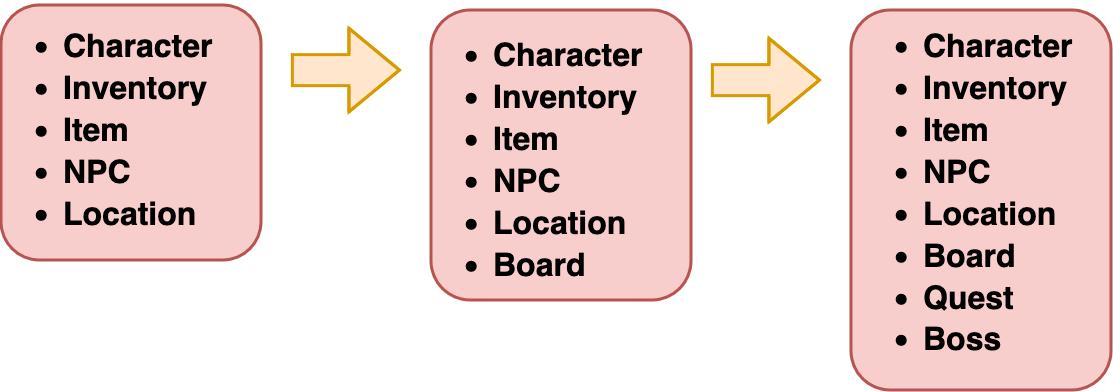

In [16]:
display(Image(filename=project_path+'images/class2/second_part.png', width=800, height=400))

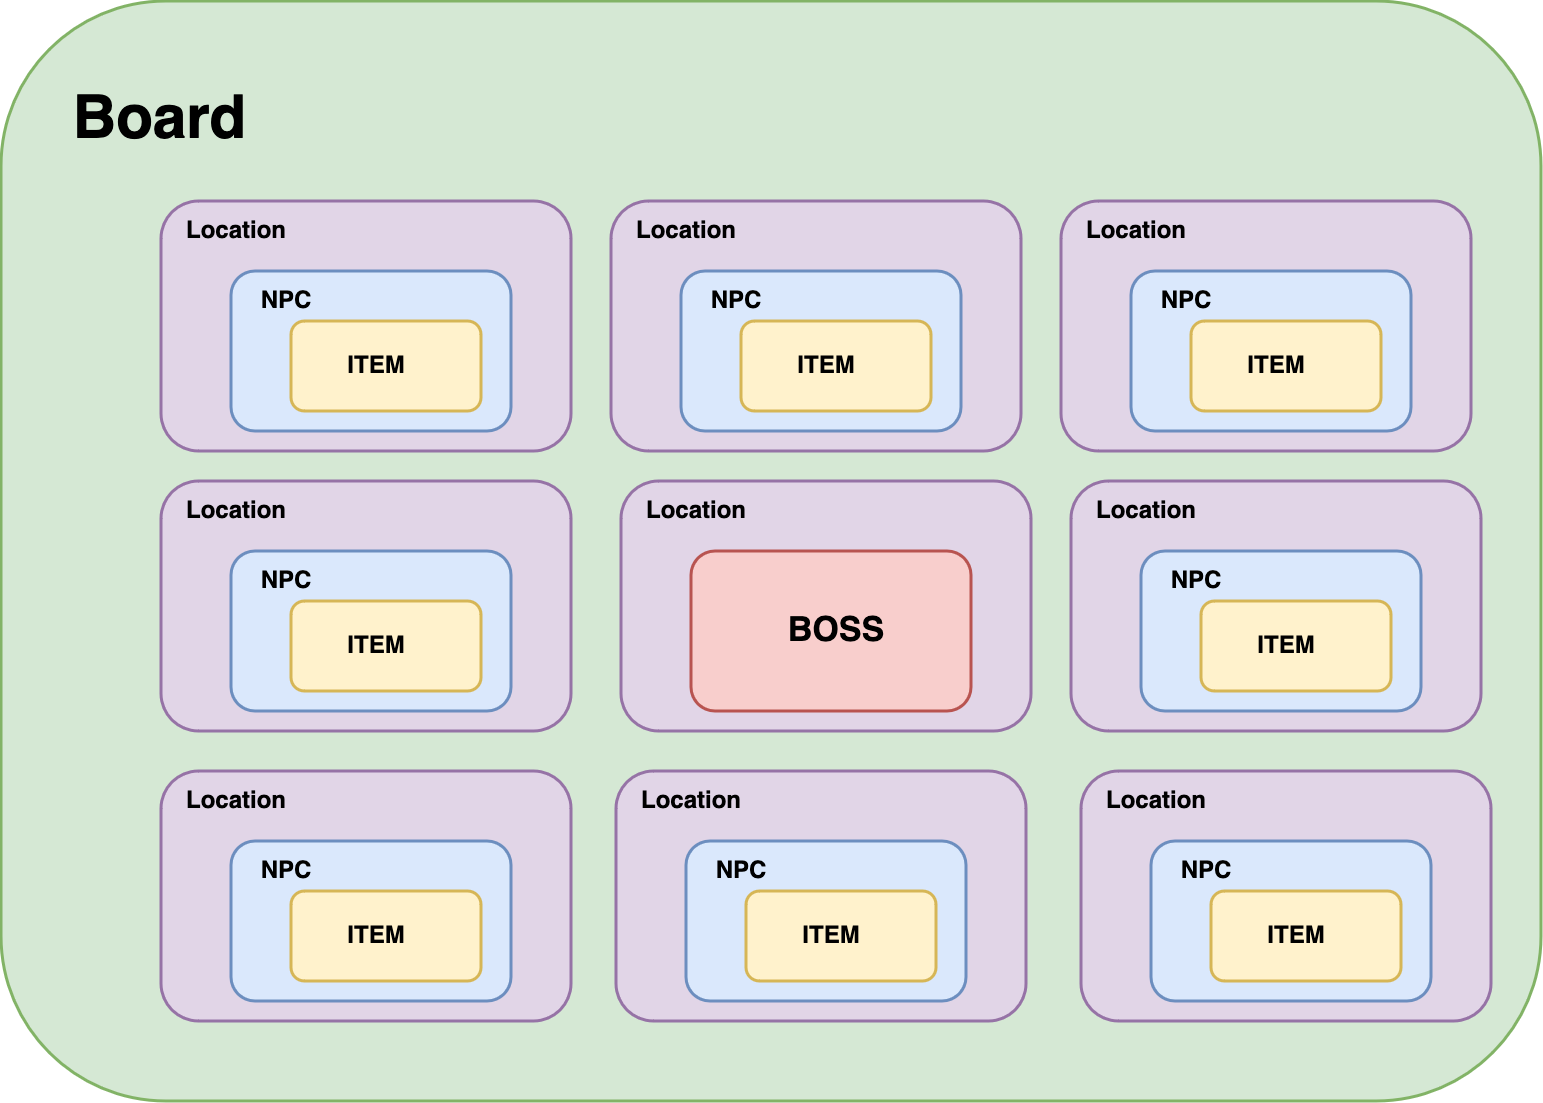

In [17]:
display(Image(filename=project_path+'images/class2/board.png', width=800, height=400))

**Exercise 4:** Create class `Board` to manage the game board.
Implement a class to represent the game board, similar to the previous class the board should be a 2D game board with size NxN.

  1. Create an `__init__` method with parameters:
    - size: int
    - locations: list of instances `Location`
    - board_representation: a 2D structure that represents the board

  2. Implement the `generate_board` method:
    - Create and return a 2D list representing the game board.
    - The board should be N x N and filled with empty spaces (' ').
    - The provided locations should be placed in the board
    - The locations that are not the provided should be Wilderness, like this: `Location("Wilderness", "#4a6741")`
  
  3. Implement the `get_location` method:
    - It should return the location of a given (x,y) position.

  4. Implement the `convert_row_to_str` method:
    - It should recieve a row of the board_representation and return the row in string format proper for priting.

  5. Implement the `board` property:
    - It should print the board representation, like this:
    
    Wilderness | Wilderness | Wilderness | Wilderness | The Wall
    
    Wilderness | Wilderness | Wilderness | Wilderness | Wilderness
    
    Wilderness | Wilderness | Winterfell | Wilderness | Wilderness
    
    Wilderness | Wilderness | King's Landing | Wilderness | Wilderness
    
    Wilderness | Wilderness | Wilderness | Wilderness | Wilderness



In [ ]:
locations = [Location("Winterfell", "#444444", npcs=[
                NPC("Stark Steward", "Merchant"),
                NPC("Maester Luwin", "Innkeeper"),
                NPC("Ser Rodrik Cassel", "Guard")
            ]),
            Location("King's Landing", "#f1c232", npcs=[
                NPC("Street Vendor", "Merchant"),
                NPC("Tavern Keeper", "Innkeeper"),
                NPC("City Watch Guard", "Guard")
            ]),
            Location("The Wall", "#fffafa", npcs=[
                NPC("Night's Watch Steward", "Merchant"),
                NPC("Castle Black Cook", "Innkeeper"),
                NPC("Night's Watch Ranger", "Guard")
            ])]

In [ ]:
import random

class GameBoard:
    def __init__(self, size):
        self.size = size
        self.locations = [
            Location("Winterfell", "#444444", npcs=[
                NPC("Stark Steward", "Merchant"),
                NPC("Maester Luwin", "Innkeeper"),
                NPC("Ser Rodrik Cassel", "Guard")
            ]),
            Location("King's Landing", "#f1c232", npcs=[
                NPC("Street Vendor", "Merchant"),
                NPC("Tavern Keeper", "Innkeeper"),
                NPC("City Watch Guard", "Guard")
            ]),
            Location("The Wall", "#fffafa", npcs=[
                NPC("Night's Watch Steward", "Merchant"),
                NPC("Castle Black Cook", "Innkeeper"),
                NPC("Night's Watch Ranger", "Guard")
            ])]
        self.wilderness = Location("Wilderness", "#4a6741")
        self.board_representation = self.generate_board()

    def generate_board(self):
        board_representation = [[self.wilderness for _ in range(self.size)] for _ in range(self.size)]
        available_positions = [(x, y) for x in range(self.size) for y in range(self.size)]

        for location in self.locations:
            if available_positions:
                x, y = random.choice(available_positions)
                board_representation[y][x] = location
                available_positions.remove((x, y))
            else:
                break  # No more available positions

        return board_representation

    def get_location(self, x, y):
        return self.board_representation[x][y]

    def convert_row_to_str(self,row):
        return ' | '.join([location.name for location in row])

    @property
    def board(self):
        for row in self.board_representation:
            print(self.convert_row_to_str(row))
        print()

**Exercise 5:** Implement Quest System

Implement a Quest class with the following attributes.


  1. Create an `__init__` method with parameters:
    - name: string

    - description: string
        
    - reward_description: string

    - reward: lambda function
    
    - completion_condition: lambda function

    - completed: boolean

    - location: string

  2. Create a `complete` method that recieves a character as argument.

    - It shoud check if the completion_condition is true, if it's true should reward the character and return True. Otherwise, return False.
    
    - It should also modify the state of completed.

  
  3. Create a `__str__` method.

    - It shoud return a string with name and description of the quest

  
  4. Create an instance of quest with the following attributes:

    - Name: "Defend The Wall"

    - Description: "Protect The Wall from the White Walkers."

    - Reward Description: "You earned 100 gold."

    - Reward: Function to dd 100 gold to the player

    - Completion condition: "If the player location is The Wall"

  5. Create a character and test your `Quest`.


In [ ]:
class Character:
    def __init__(self, name, house, strength, intelligence, charisma, defense):
        self.name = name
        self.house = house
        self.strength = max(1, strength)  # Ensure strength is at least 1
        self.intelligence = intelligence
        self.charisma = charisma
        self.defense = max(0, defense)  # Ensure defense is non-negative
        self._health = 100
        self.gold = 100
        self.inventory = Inventory()
        self.position = (0, 0)
        self.defending = False

    @property
    def speak_words(self):
        return f"{self.name} says: {self.house.words}"

    def move(self, direction):
        x, y = self.position
        if direction == 'north':
            self.position = (x-1, y)
        elif direction == 'south':
            self.position = (x+1, y)
        elif direction == 'east':
            self.position = (x, y+1)
        elif direction == 'west':
            self.position = (x, y-1)

    @property
    def total_stats(self):
        return self.strength + self.intelligence + self.charisma + self.defense

    @property
    def health(self):
        return self._health

    @health.setter
    def health(self, value):
        if value < 0:
            self._health = 0
        elif value > 100:
            self._health = 100
        else:
            self._health = value

    @health.deleter
    def health(self):
        del self._health

    @property
    def inventory_value(self):
        return self.inventory.get_total_value()

    def use_item(self, item_name):
        for item in self.inventory.items:
            if item.name == item_name:
                item.use(self)
                self.inventory.remove_item(item)
                return True
        print(f"{self.name} does not have {item_name}")
        return False


    def take_damage(self, amount):
        self.health = max(0, self.health - amount)


    def is_alive(self):
        return self.health > 0

    def spend_gold(self, amount):
        if self.gold >= amount:
            self.gold -= amount
            return True
        return False

    def earn_gold(self, amount):
        self.gold += amount

In [ ]:
stark = House("Stark", "Direwolf", "Winter is Coming")
jon_snow = Character('Jon Snow', stark, 10, 5, 10, 8)

In [ ]:
class Quest:
    def __init__(self,
                 
    def complete(self,

    def __str__(self

**Exercise 6:** Implement the Boss Class

1. Create the class definition:
- Define a class called `Boss` that inherits from the `Character` class.
- `class Boss(Character):`

2. Implement the `__init__` method with parameters:
- Parameters:
  - `name`: a string representing the name of the boss.
  - `strength`: an integer representing the boss's strength attribute.
  - `intelligence`: an integer representing the boss's intelligence attribute.
  - `charisma`: an integer representing the boss's charisma attribute.
  - `defense`: an integer representing the boss's defense attribute.
  - `special_ability`: a function representing the boss's unique special ability.

- In the `__init__` method:
  - Call the superclass initializer using `super().__init__(...)`.
  - Set `self.special_ability` to the provided special ability function.
  - Set `self.max_health` to 150.
  - Set `self.health` to `self.max_health`.

3. Implement the `use_special_ability` method:
  - This method should take a `target` parameter.
  - It should call `self.special_ability(self, target)` and return the result.

4. Implement the following functions outside the `Boss` class:

  - `cersei_ability(self, target):`
    - Calculate damage as `self.intelligence * 2`.
    - Call `target.take_damage(damage)`.
    - Return a string: f"Cersei uses 'Wildfire Plot' and deals {damage} damage!"

  - `night_king_ability(self):`
    - Increase `self.health` by 20.
    - Return a string: f"The Night King uses 'Raise the Dead' and heals for 20 health!"

  - `dragon_ability(self, target):`
    - Calculate damage as `self.strength * 3`.
    - Call `target.take_damage(damage)`.
    - Return a string: f"Drogon uses 'Dragonfire' and deals {damage} damage!"

5. Create a list called `bosses` containing the following `Boss` instances:
  - Cersei Lannister (Lannister, strength 10, intelligence 15, charisma 18, defense 8)
  - Night King (White Walkers, strength 20, intelligence 15, charisma 10, defense 15)
  - Drogon (Targaryen, strength 25, intelligence 10, charisma 5, defense 20)


In [ ]:
class Boss(Character):
    def __init__(self,

    def use_special_ability(self,

In [ ]:

# Define boss characters
def cersei_ability(self, target):
    
def night_king_ability(self):
    
def dragon_ability(self, target):
    

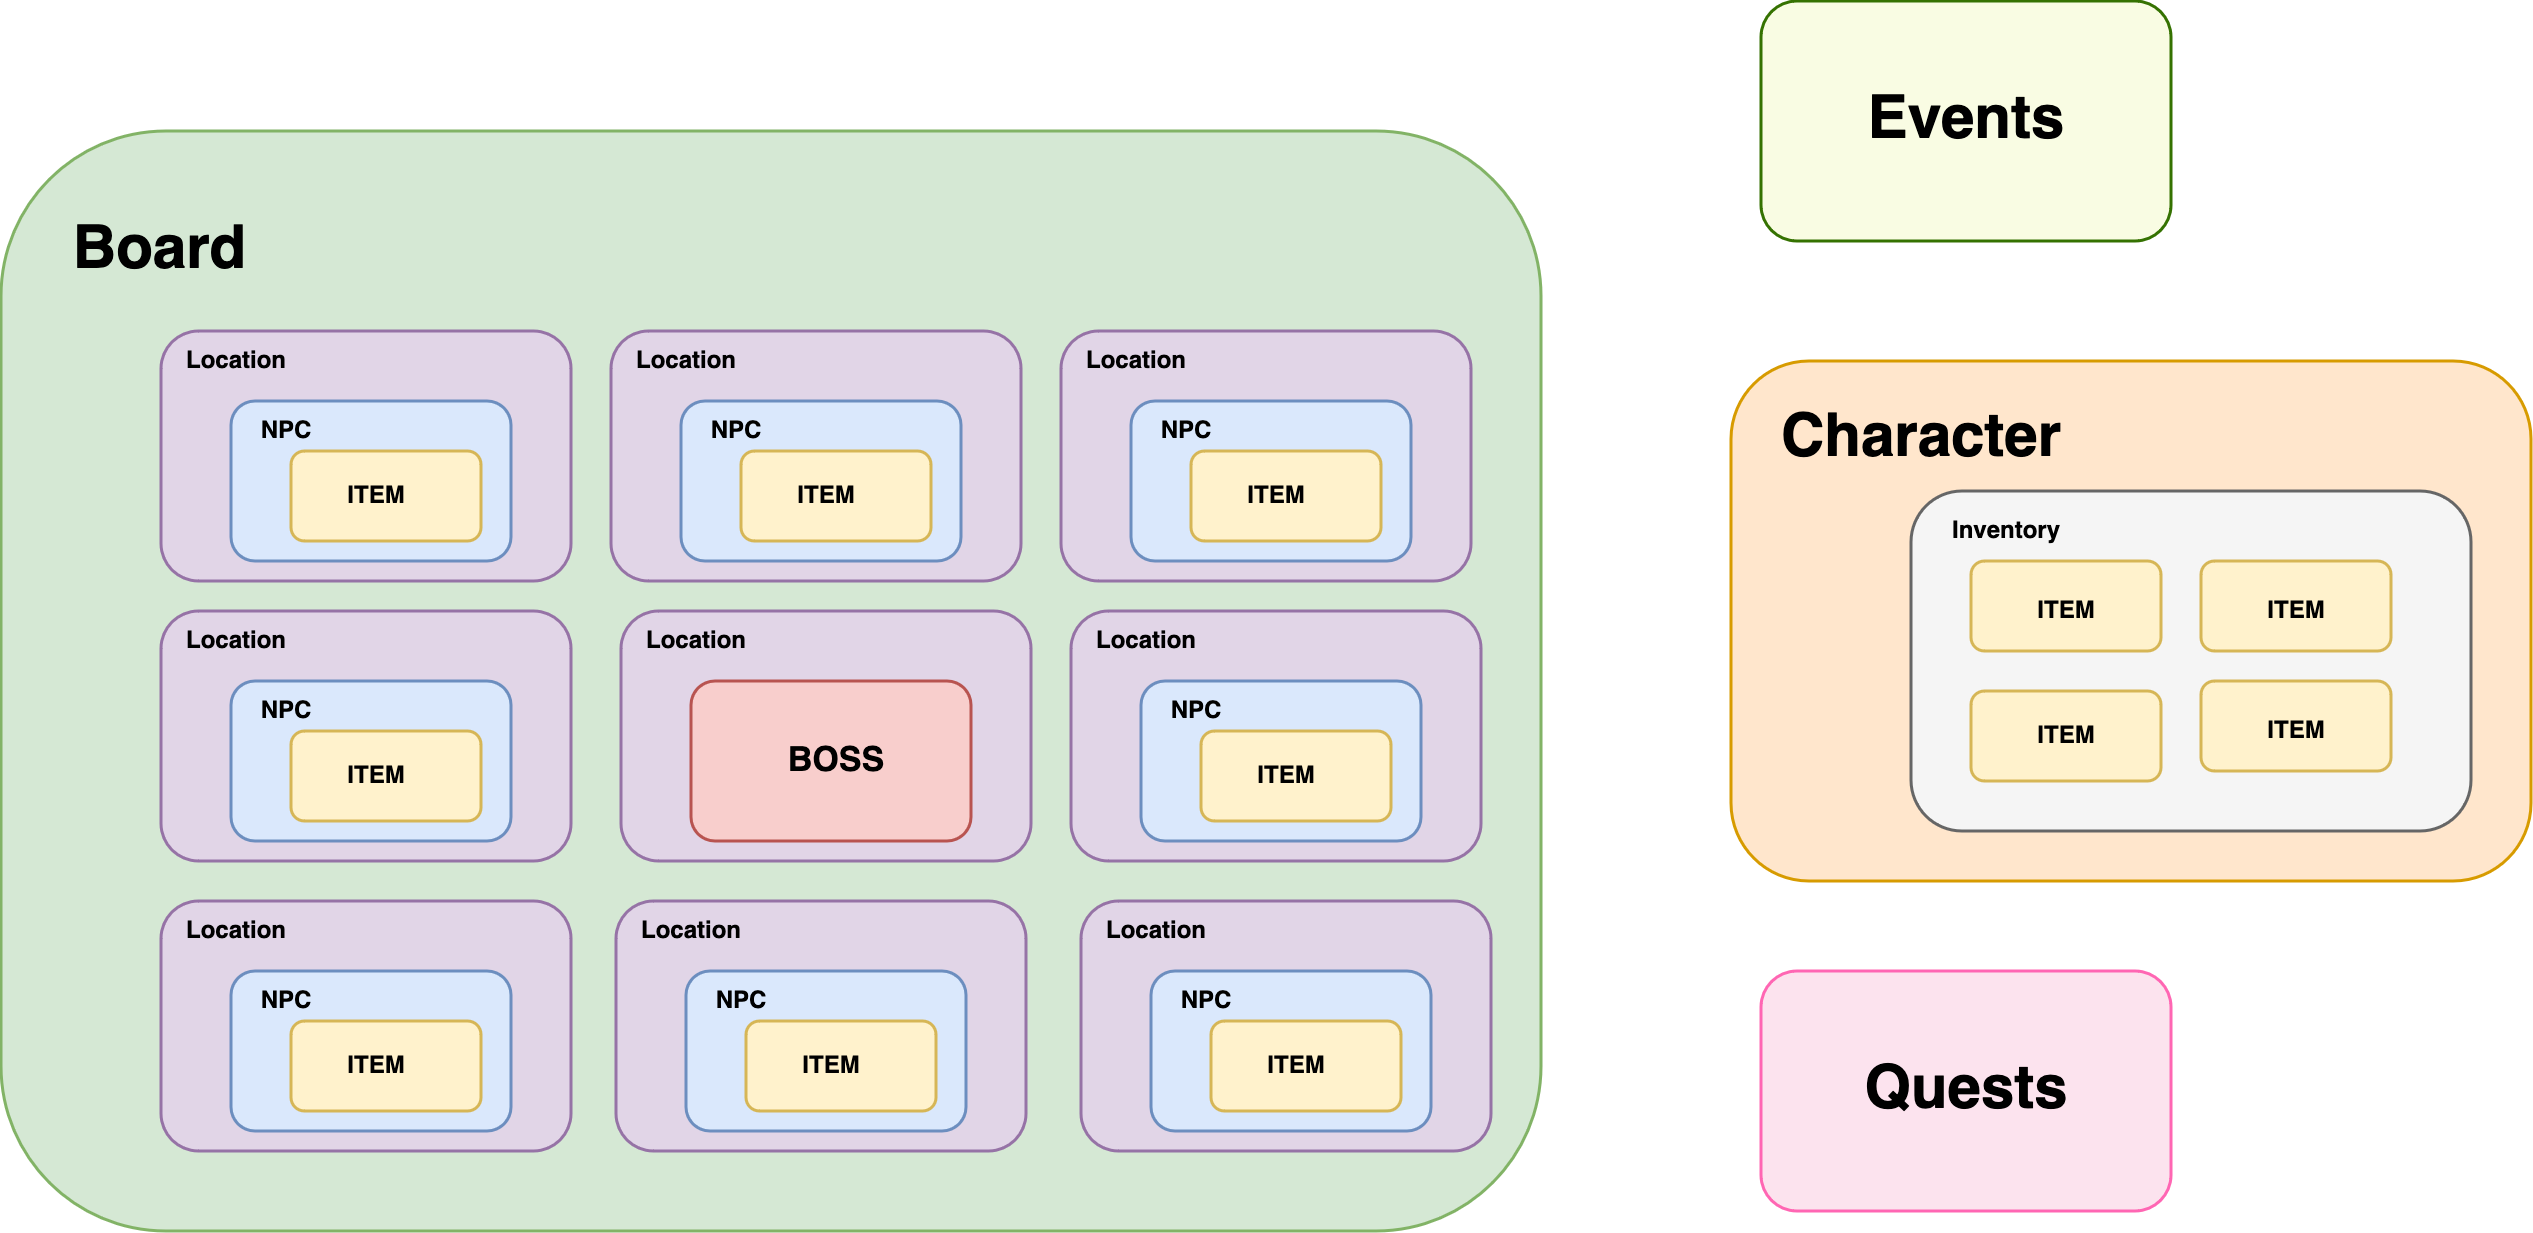

In [18]:
display(Image(filename=project_path+'images/class2/all_components.png', width=800, height=400))

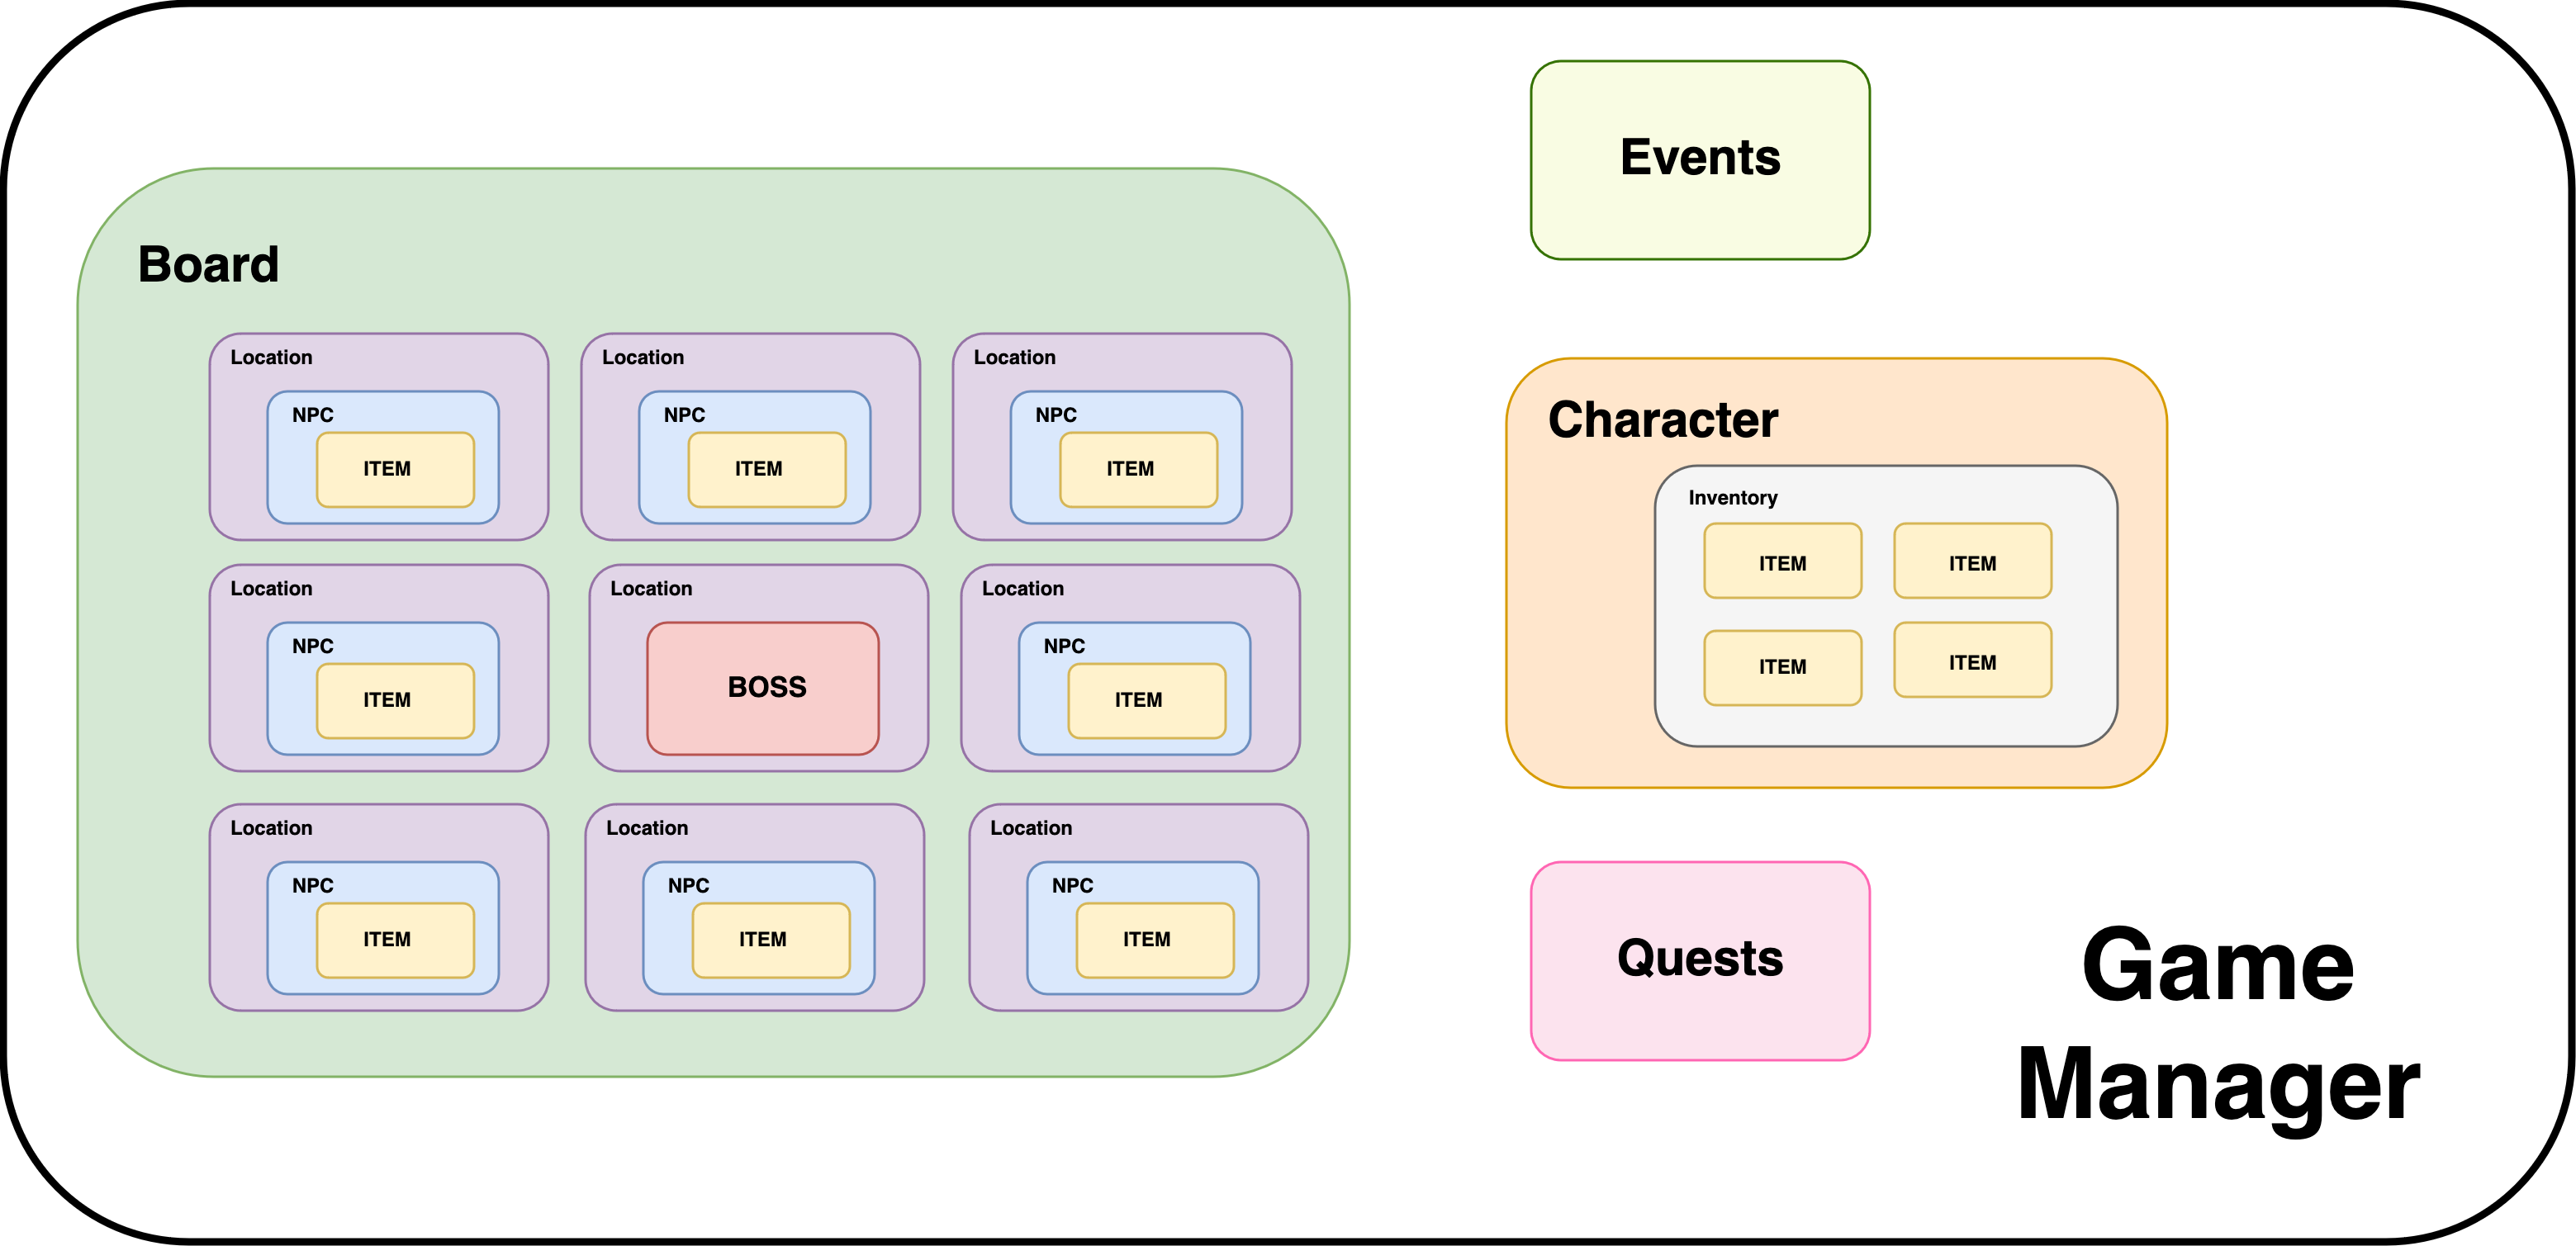

In [20]:
display(Image(filename=project_path+'images/class2/game_manager.drawio.png', width=800, height=400))

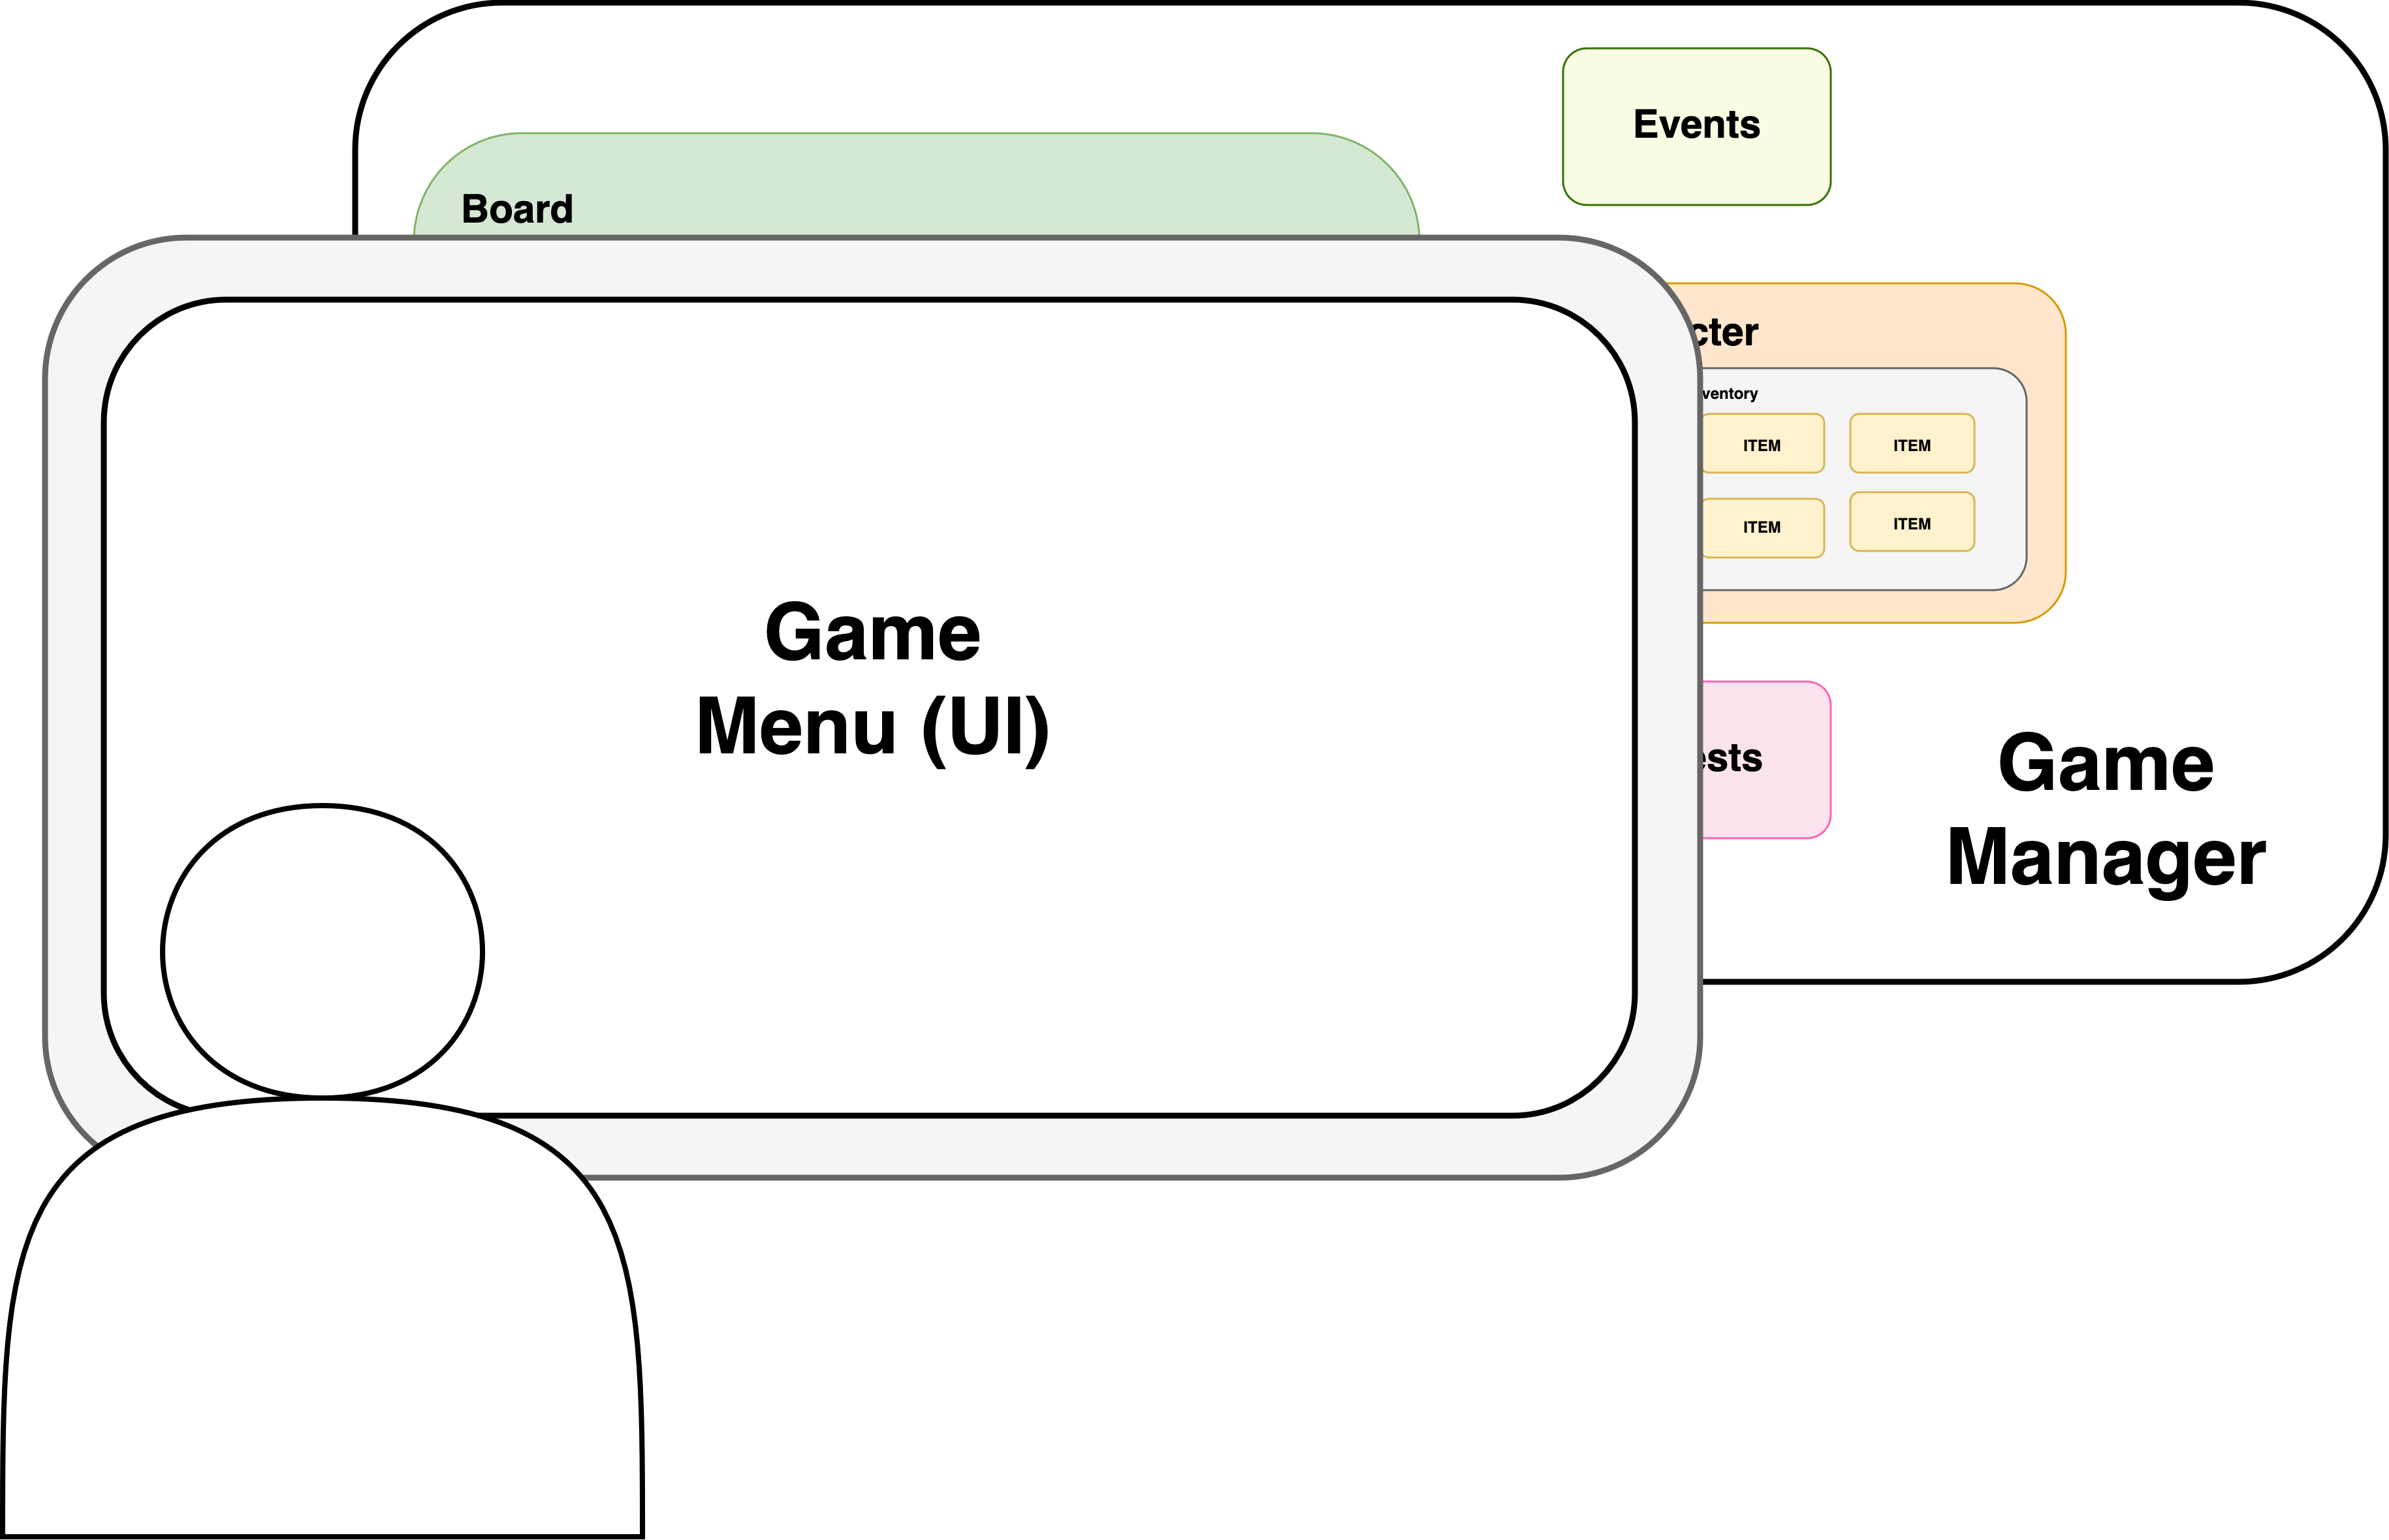

In [22]:
display(Image(filename=project_path+'images/class2/game_ui.png', width=800, height=400))